# Introdução aos Métodos Discretos

Nome: Yago Pereira dos Anjos Santos

Resolva pelo MDF a seguinte equação
\begin{equation*}
    \begin{cases}
    \frac{d  }{dx}\frac{k(x)du}{dx} + (37 - u)  +  g(x)= 0 & \text{ para } x\in (0,1)\\
    u(x) = 37 &\text{ para } x=0\\
    u(x) =  37 &\text{ para } x=1\\
    \end{cases}
\end{equation*}
onde
\begin{equation*}
    k(x) = \begin{cases}
    0.55 & \text{para } x \in [0.4, 0.6]\\
    0.45 & \text{c.c.}
\end{cases}
\end{equation*}
e
\begin{equation*}
    g(x) = \begin{cases}
    4000 & \text{para } x \in [0.4, 0.6]\\
    400 & \text{c.c.}
\end{cases}
\end{equation*}
    
Considerando o caso geral e o meio heterogêneo. Tome $h = 0.01$ e $h = 0.001$ e compare os resultados

### Comparação dos Resultados

A construção do sistema foi feita considerando o caso geral e o meio heterogêneo, que envolve duas discretizações subsequentes usando diferenças centradas para derivada primeira (uma para o termo mais interno e outra para o termo externo). Agora, lembramos que a diferença centrada tem ordem $O(h^{2})$. Tomando $h_{1} = 0.01$ obtemos a solução em azul plotada no algoritmo a seguir. Para $h_{2} = 0.001$ obtemos a solução em vermelho plotada juntamente da solução em azul também no algoritmo a seguir. De $h_1$ para $h_2$ estamos diminuindo o passo por um fator de $10$. Como o erro na aproximação é proporcional a $h^{2}$, o erro na solução que utiliza $h_{2}$ é reduzido 100 vezes. Ou seja, o erro da nova solução que foi obtido com $h_{2}$ é aproximadamente $\frac{1}{100}$ do erro da solução obtida com a solução utilizando $h_{1}$. Além disso, na segunda solução tem uma curva mais suave devido a um aumento no número de pontos da discretização no domínio. E por fim, a redução do erro na segunda solução se reflete na diferença nos picos das soluções (que ocorre entre 0.4 e 0.6), que na segunda solução se apresenta mais abaixo em relação ao da primeira solução.

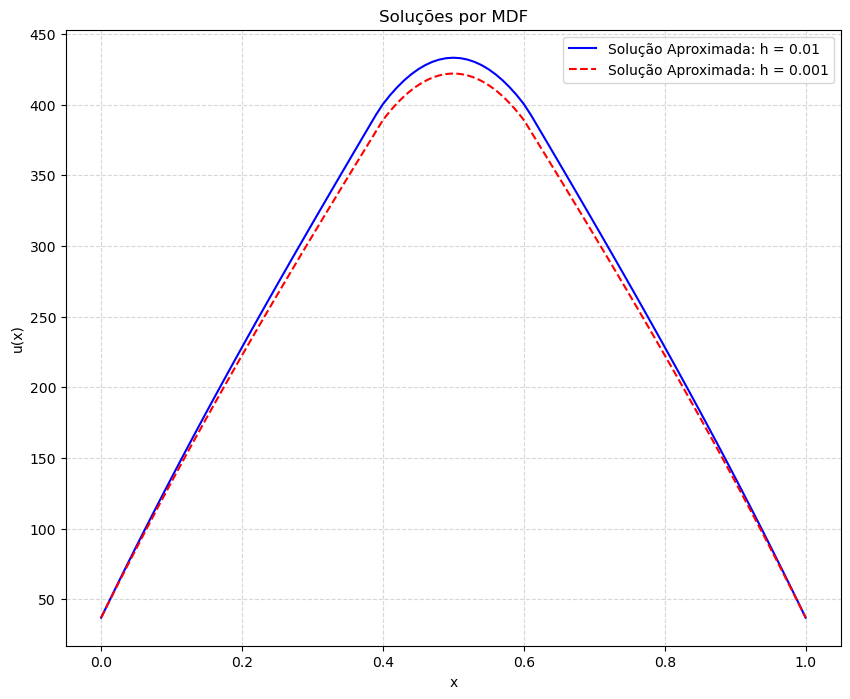

Erro máximo: 11.672040902549838.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


def k(x):
    return 0.55 if 0.4 <= x <= 0.6 else 0.45


def g(x):
    return 4000 if 0.4 <= x <= 0.6 else 400


def f(x):
    return -g(x) - 37


''' Construção da matriz A '''


def matriz(x, tam, h):
    A = np.zeros((tam, tam))
    A[0, 1] = 2*k(x[1])*k(x[2])/(k(x[1]) + k(x[2]))

    for i in range(tam):
        A[i, i] = -(2*k(x[i])*k(x[i+1])/(k(x[i]) + k(x[i+1])) + 2*k(x[i+1])*k(x[i+2])/(k(x[i+1]) + k(x[i+2]))) - h**2
        if 0 < i < tam-1:
            A[i, i-1] = 2*k(x[i])*k(x[i+1])/(k(x[i]) + k(x[i+1]))
            A[i, i+1] = 2*k(x[i+1])*k(x[i+2])/(k(x[i+1]) + k(x[i+2]))

    A[tam-1, tam-2] = 2*k(x[tam-1])*k(x[tam])/(k(x[tam-1]) + k(x[tam]))
    return A


''' Construção do vetor F '''


def vetor(x, tam, h):
    F = np.zeros(tam)
    F[0] = f(x[1]) - 37*(2*k(x[0])*k(x[1])/(k(x[0]) + k(x[1])))/h**2

    for i in range(1, tam-1):
        F[i] = f(x[i+1])

    F[tam-1] = f(x[tam]) - 37*(2*k(x[tam-1])*k(x[tam])/(k(x[tam-1]) + k(x[tam])))/h**2

    return F


def solver(h):
    x = np.arange(0, 1+h, h)
    tam = len(x) - 2
    A = matriz(x, tam, h)
    F = vetor(x, tam, h)
    solucao = np.linalg.solve(A, F*h**2)
    u = [37, *solucao, 37]
    return x, u


x1, u1 = solver(0.01)
x2, u2 = solver(0.001)

plt.figure(figsize=(10, 8))
plt.plot(x1, u1, color='blue', ls='-', label='Solução Aproximada: h = 0.01')
plt.plot(x2, u2, color='red', ls='--', label='Solução Aproximada: h = 0.001')
plt.grid(alpha=0.5, ls='--')
plt.title('Soluções por MDF')
plt.legend()
plt.xlabel('x')
plt.ylabel('u(x)')
plt.show()

# Interpolar a solução com h=0.001 nos pontos da malha com h=0.01
interp_u2 = interp1d(x2, u2, kind='cubic')
u2_interp_at_x1 = interp_u2(x1)

# Erro absoluto e erro máximo
erro_absoluto = np.abs(u1 - u2_interp_at_x1)
erro_maximo = np.max(erro_absoluto)
erro_medio = np.mean(erro_absoluto)

print(f'Erro máximo: {erro_maximo}.')